In [141]:
import pandas  as pd
def load_data():
    df_train_feature=pd.read_csv('../input/train_feature.csv')
    df_train_label=pd.read_csv('../input/train_label.csv')
    df_train_feature=df_train_feature.groupby(by='日期').mean().reset_index()
    df_train_feature['辐照度']=df_train_feature['辐照度']*8
    df_train=pd.merge(df_train_feature,df_train_label)
    df_train.drop(['时刻'],axis=1,inplace=True)

    df_test_feature=pd.read_csv('../input/test_feature.csv')
    df_test_feature=df_test_feature.groupby(by='日期').mean().reset_index()
    df_test_feature['辐照度']=df_test_feature['辐照度']*8
    df_test=df_test_feature.drop(['时刻'],axis=1)

    return df_train,df_test
df_train,df_test=load_data()
df_train.head()

,日期,辐照度,风速,风向,温度,湿度,气压,电场实际太阳辐射指数
0,1,1008.0,1.6625,169.625,-4.9000,43.875,69800.0,0.108799
1,2,1069.0,1.1750,185.375,-3.9625,44.125,69537.5,0.130559
2,3,1152.0,1.4625,217.375,-4.7625,42.625,69487.5,0.114239
3,4,1171.0,1.1625,143.375,-4.8125,29.625,69287.5,0.081599
4,5,1170.0,1.0125,162.375,-7.2375,27.500,69175.0,0.212158


## 热力图

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

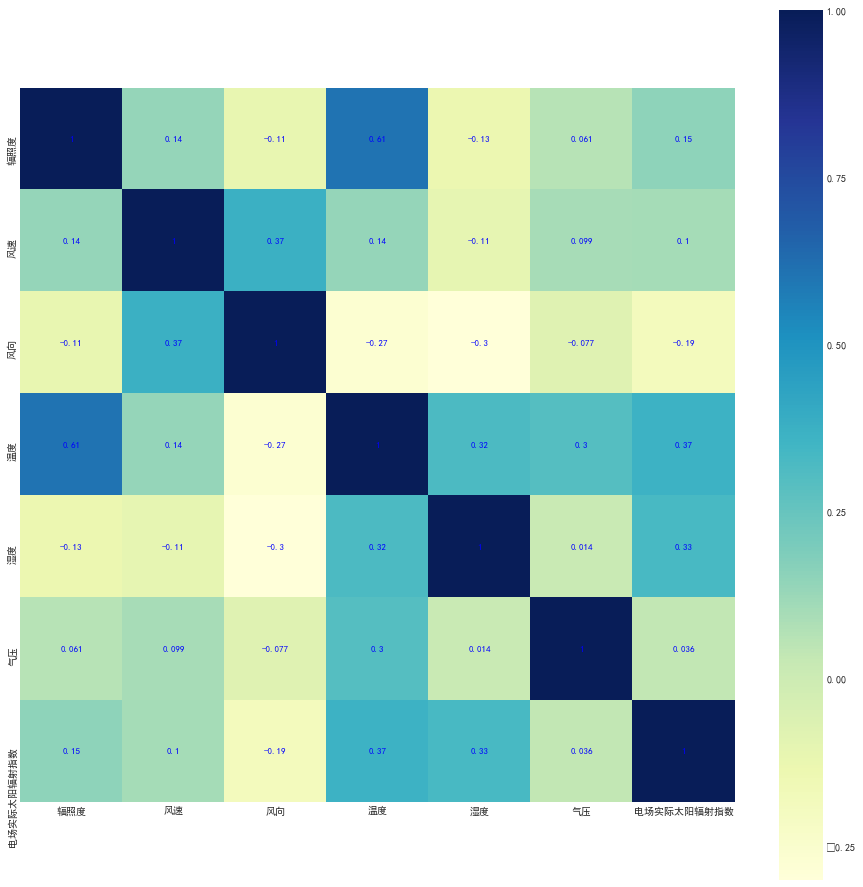

In [143]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 16))
corr = df_train[['辐照度','风速','风向','温度','湿度','气压','电场实际太阳辐射指数']].corr()#计算各变量的相关性系数
sns.heatmap(corr, annot=True,cmap="YlGnBu", annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'},square=True)#绘制相关性系数热力图
plt.show()

从上面热力图我们可以看出，相关性系数的绝对值越大，两个变量相关性越强，负值为负相关，正值为正相关。与“电场实际太阳能辐射指数”相关性排序：温度>湿度>风向>辐照度>风速>气压

## 分布图

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


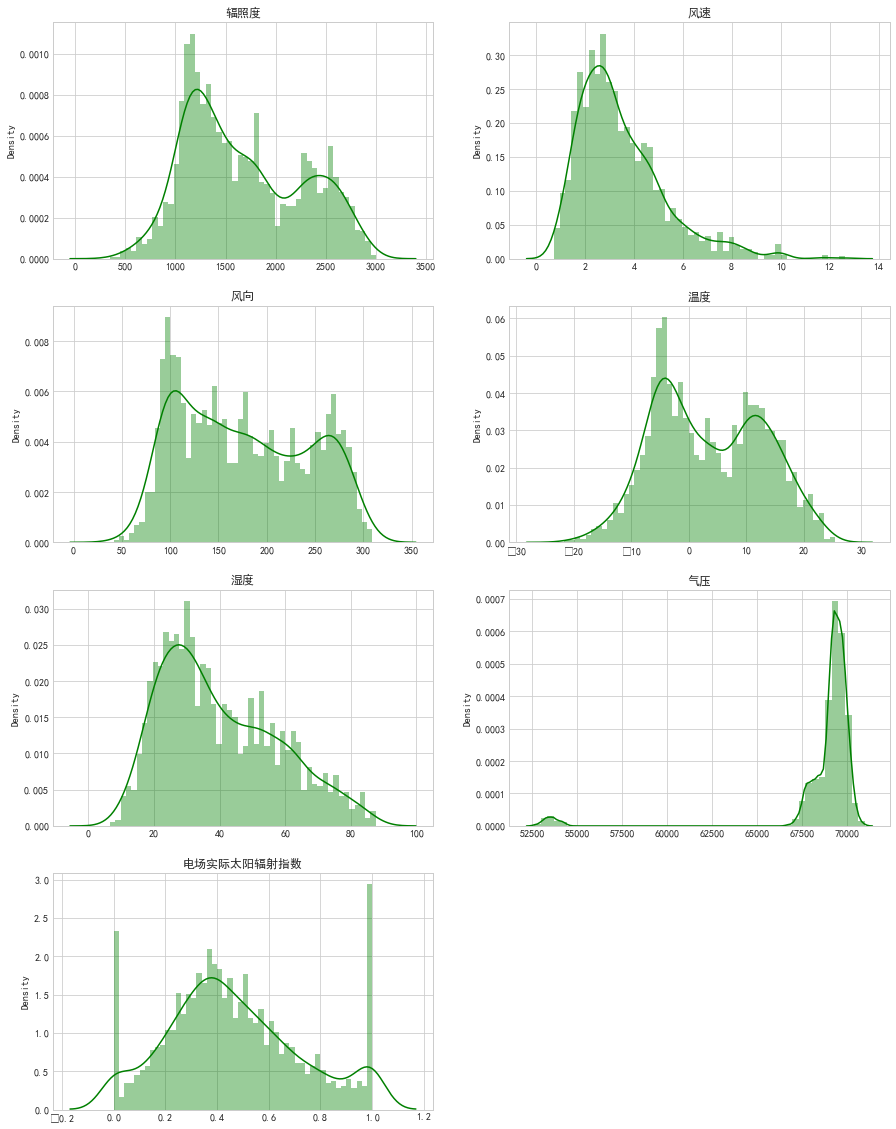

In [144]:
columns=['辐照度','风速','风向','温度','湿度','气压','电场实际太阳辐射指数']
grid = gridspec.GridSpec(4, 2)
plt.figure(figsize=(15,20))

for n, col in enumerate(df_train[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_train[col], bins = 50, color='g') #Will receive the "semi-salmon" violin
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

## 选取特征

 根据上面的分析，我们最终选取：温度，湿度，风向，辐照度这四个特征


In [145]:
df_train.head()

,日期,辐照度,风速,风向,温度,湿度,气压,电场实际太阳辐射指数
0,1,1008.0,1.6625,169.625,-4.9000,43.875,69800.0,0.108799
1,2,1069.0,1.1750,185.375,-3.9625,44.125,69537.5,0.130559
2,3,1152.0,1.4625,217.375,-4.7625,42.625,69487.5,0.114239
3,4,1171.0,1.1625,143.375,-4.8125,29.625,69287.5,0.081599
4,5,1170.0,1.0125,162.375,-7.2375,27.500,69175.0,0.212158


In [146]:
df_test.head()

,日期,辐照度,风速,风向,温度,湿度,气压
0,1,1533.0,9.9000,278.875,-6.7875,23.250,68737.5
1,2,1575.0,12.6375,279.750,-8.8375,22.500,69412.5
2,3,1610.0,9.7500,278.000,-7.4500,14.625,69750.0
3,4,1610.0,3.1000,218.125,-6.7125,13.125,69825.0
4,5,1358.0,1.9875,192.250,-4.3750,15.750,69187.5


## 训练模型

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor,HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [148]:
# df_train.drop(['风速','气压','温度','湿度'],axis=1,inplace=True)
# df_test.drop(['风速','气压','温度','湿度'],axis=1,inplace=True)

def get_train_test(test_size=0.2):
    X = df_train.drop(['日期', '电场实际太阳辐射指数'], axis=1, inplace=False)
    X=scaler.fit_transform(X)
    y = df_train['电场实际太阳辐射指数']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [149]:
SEED=222
scaler=StandardScaler()
X_train, X_test, y_train, y_test=get_train_test()
def get_models():
    """Generate a library of base learners."""
    mlp=MLPRegressor()
    lr = LinearRegression()
    dt=DecisionTreeRegressor()
    knn=KNeighborsRegressor()
    svm=SVR()
    rf = RandomForestRegressor(max_depth=4,random_state=SEED)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=SEED)
    ab = AdaBoostRegressor(random_state=SEED)
    xgb = XGBRegressor()
    lgb = LGBMRegressor()
    models = {
        # 'mlp':mlp,
        'logistic': lr,
        # 'decision tree':dt,
        'knn':knn,
        'svm':svm,
        'random forest': rf,
        'gbm': gb,
        # 'ab': ab,
        'xgb': xgb,
        'lgb': lgb
        }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    x_sub = df_test.drop(['日期'], axis=1, inplace=False)
    x_sub=scaler.transform(x_sub)
    P_sub = np.zeros((x_sub.shape[0], len(model_list)))
    P = pd.DataFrame(P)
    P_sub = pd.DataFrame(P_sub)
    print("训练各个模型")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict(X_test)
        P_sub.iloc[:, i] = m.predict(x_sub)
        cols.append(name)
        print("done")
    P.columns = cols
    P_sub.columns = cols
    print("Done.\n")
    return P,P_sub


def score_models(P, y):
    """Score model in prediction DF"""
    print("评价每个模型.")
    for m in P.columns:
        score = mean_absolute_error(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")


def predict(P_sub):
    df_test['prediction'] = P_sub.mean(axis=1)
    df_test['time']=df_test['日期']
    df_test[['time', 'prediction']].to_csv('../result/1_eda_ensemble.csv', index=False)
    print("predictin done")


models = get_models()
P,P_sub = train_predict(models)
score_models(P, y_test)
print("Mean absolute error regression loss: %.3f" % mean_absolute_error(y_test, P.mean(axis=1)))
predict(P_sub)

训练各个模型
logistic... done
knn... done
svm... done
random forest... done
gbm... done
xgb... done
lgb... done
Done.

评价每个模型.
logistic                  : 0.186
knn                       : 0.184
svm                       : 0.175
random forest             : 0.181
gbm                       : 0.181
xgb                       : 0.181
lgb                       : 0.188
Done.

Mean absolute error regression loss: 0.176
predictin done
